<a href="https://colab.research.google.com/github/30002672/traveling_salesman_problem/blob/main/v4_of_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[40.51906906 40.2981113  40.49386502 40.46951435 40.37973608 40.46556723
 40.30698201 40.27882421 40.37528866 40.30485595 40.51906906 40.2981113
 40.49386502 40.46951435 40.37973608 40.46556723 40.30698201 40.27882421
 40.37528866 40.30485595 40.51906906 40.2981113  40.49386502 40.46951435
 40.37973608 40.46556723 40.30698201 40.27882421 40.37528866 40.30485595
 40.51906906 40.2981113  40.49386502 40.46951435 40.37973608 40.46556723
 40.30698201 40.27882421 40.37528866 40.30485595 40.51906906 40.2981113
 40.49386502 40.46951435 40.37973608 40.46556723 40.30698201 40.27882421
 40.37528866 40.30485595 40.51906906 40.2981113  40.49386502 40.46951435
 40.37973608 40.46556723 40.30698201 40.27882421 40.37528866 40.30485595
 40.51906906 40.2981113  40.49386502 40.46951435 40.37973608 40.46556723
 40.30698201 40.27882421 40.37528866 40.30485595 40.51906906 40.2981113
 40.49386502 40.46951435 40.37973608 40.46556723 40.30698201 40.27882421
 40.37528866 40.30485595 40.51906906 40.2981113  40.49

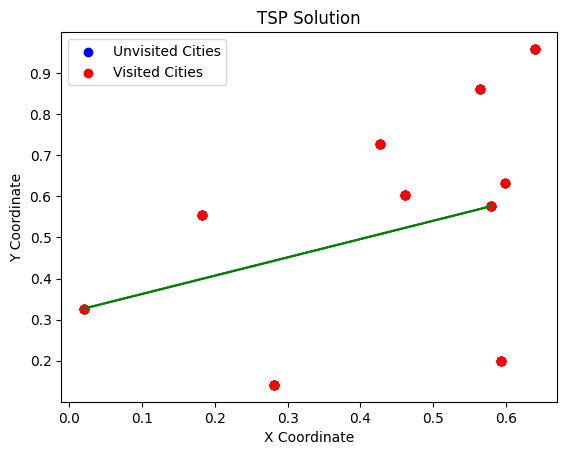

[[-1 -1  1 -1  1  1  1 -1  1 -1]
 [ 1  1  1 -1 -1  1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1  1  1 -1 -1]
 [ 1  1  1 -1 -1  1  1 -1 -1  1]
 [ 1 -1 -1  1 -1  1  1  1  1 -1]
 [ 1 -1  1  1 -1  1  1  1 -1  1]
 [ 1  1  1 -1 -1  1 -1 -1  1  1]
 [-1 -1 -1 -1 -1  1  1  1 -1 -1]
 [-1 -1  1 -1  1  1 -1  1  1 -1]
 [-1  1  1 -1  1 -1  1  1 -1 -1]]


In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

h_array = [] # array for energy change

def method(left_sigma, right_sigma, J, h, omega, m, iterm, tinc, tinit, r,counter, c):
    global wik



    Ts = tinit
    delta_t = 0
    hamiltonian = 0.0
    for s in range(1, iterm + 1):
        c+=1
        counter.append(c) # array for the flips changes #array for grpahing only (not included in puesdocode)


        if s % 2 == 1:
            A = "L"
            B = "R"
        else:
            A = "R"
            B = "L"

        ps = pk(s)  # updating ps and cs
        cs = ck(s)

        #tinit = tinit + delta_t  # Adjusted temperature update
        Ts = tinit * (r ** (s - 1))  # temperature function (equation 8)



        bol = False  # Initialize bol
        for i in range(m):
            for k in range(m):
                rand_num = random.random()

                omega[i][k] = cs * omega[i][k] # temportalory decease wik

                if ps < rand_num:
                    omega[i][k] = 0 # temporatily set wik to 0 zero with probabiltiy random_num

                delta_ik_sum = np.dot(J[i, k], right_sigma.flatten())  # Corrected delta_ik_sum calculation

                #delta_ik_sum = (np.dot(J[i, k, :, :], right_sigma)).sum()  # Corrected delta_ik_sum calculation

                #2d is being multipled with 2d matrix try to unflaten and find dot product

                delta_ik = 2 * left_sigma[i, k] * ((h[k] / 2) + delta_ik_sum + omega[i, k] * right_sigma[i, k])

                # do not directly calculate the change in energy
                # use quobo hamiltonian and subtract from previous hamiltonian to find eneergy change
                # use equation 3 and use only the first 3 lines to calculate the energy change( last time is constant so we can ignore)




                #delta_ik = 2 * np.dot(left_sigma[i, k], [h[i, k] / 2, delta_ik_sum, omega[i, k], right_sigma[i, k]]) # np.dot function for delta ik not working

               # print(np.exp(-delta_ik / Ts)[0])
                Pik = min(1, np.exp(-delta_ik / Ts)[0])  # Corrected Pik calculation

                if Pik > random.random():
                    if A == "L":
                        left_sigma[i, k] *= -1
                    elif A == "R":
                        right_sigma[i, k] *= -1
                    bol = True


        # hamiltonian -= np.sum(np.dot(J[i, :, :, :], left_sigma) * right_sigma)
        # hamiltonian -= 0.5 * np.dot(h[i], left_sigma[i, :] + right_sigma[:, i])
        # hamiltonian += np.sum(np.dot(omega[i, :], (1 - left_sigma[i, :] * right_sigma[:, i])))
        # h_array.append(hamiltonian)

        # delta_ik_values.append(Pik) # array which contains all the energy values

        if bol:
            delta_t = delta_t + tinc
        else:
            delta_t = 0

    print(hamiltonian)

    return left_sigma, right_sigma

# Other functions and initializations remain the same

m = 10
tinit = 10000000
r = 0.97
iterm = 100 # iterm needs to be msquared

left_sigma = np.random.choice([-1, 1], size=(m, m))
right_sigma = np.random.choice([-1, 1], size=(m, m))
#h= np.random.choice([-1, 1], size=(m, m))
#J = np.random.choice([-1, 1], size=(m, m, m, m))
def get_W(n):
    coordinates = np.random.rand(n, 2)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = np.linalg.norm(coordinates[i] - coordinates[j])
    return W, coordinates

def get_J(W, A, B, C, n):
    ja = np.eye(n, k=-1) + np.eye(n, k=1)
    ja[0, n-1] += 1
    ja[n-1, 0] += 1
    JA = np.kron(ja, W)

    jb = np.ones((n, n)) - np.eye(n)
    JB = np.kron(np.eye(n), jb)

    jc = np.ones((n, n)) - np.eye(n)
    JC = np.kron(jc, np.eye(n))

    # plt.imshow(0.25*A*JA + 0.25*B*JB + 0.25*C*JC)
    return 0.25*A*JA + 0.25*B*JB + 0.25*C*JC

def get_h(W, A, B, C, n):
    ha = np.sum(np.kron(np.ones(n), W), axis=0)

    hb = (n-2)*np.ones(n*n)

    hc = (n-2)*np.ones(n*n)

    return 0.1*A*ha + 0.5*B*hb + 0.5*C*hc

W, city_coordinates = get_W(m)
A, B, C = 1, 5, 5
J = get_J(W, A, B, C, m)

h = get_h(W, A, B, C, m)
print(h)

tinc = np.max(J)/90



original_sigma = left_sigma.flatten(order = 'C')
counter = []
c=0


# Rest of the initialization code remains the same
def pk(s):
    return max(0, 0.5-s/2000)

def ck(s):
    return min(1, np.sqrt(s/1000))



# adding weights from MA code
#------------------------------------------------------------------
#w = np.random.choice([-1, 1], size=(m, m))
J2 = np.zeros((m, m))
for i in range(1, m):
    for j in range(i):
        J2[i, j] = np.random.choice([-1, 1])
        J2[j, i] = J2[i, j]

# calculate lambda, the maximum eigenvalue of J
lam = np.linalg.eigvals(-J2).max()

# using lambda to determin the set of C, by comparing to the summation of Jij
# since the J matrix here is fully connected and N is large,
# lambda will always be larger than the sum of Jij, so the set of C in this case is empty
# check the text below eqn.6, but this code will also work for other types of J matrix
C_index = []
for i in range(m):
    if lam >= abs(J2[i, :]).sum():
        C_index.append(i)

# once we have the set of C, we can use eqn.6 to determine the omega vector
# in this case all the omega_i will be half lambda since set C is empty with such J
omega2 = np.ones(m) * lam/2
for i in C_index:
    sum1 = abs(J2[i, :]).sum()
    sum2 = 0
    for j in C_index:
        sum2 += abs(J2[i, j])
    omega2[i] = sum1 - 1/2 * sum2


omega_diag = np.diag(omega2)

#-------------------------------------------------------------------------------------------------------------
counter = []
c=0
# Call the method function



method(left_sigma, right_sigma, J, h, omega_diag, m, iterm, tinc, tinit, r, counter, c)






# plotting the energy cange over time ---------------------------------------------------------------------------------------


# plt.figure(figsize=(25, 10))
# plt.plot(range(len(h_array)), h_array, label='energy change over time')
# plt.xlabel('Iteration')
# plt.ylabel('Pik')
# plt.legend()
# plt.title('Energy change Over Iterations')

# plt.show()



# plotting the flips changes in origianal left sigma --------------------------------------------------------------------------

# colors = []
# for value in original_sigma:
#     if value == 1:
#         colors.append('red')
#     else:
#         colors.append('blue')
# colors = np.where(original_sigma == 1, 'yellow', 'purple')

# plt.scatter(counter, original_sigma, c=colors, cmap='viridis', s=50)

# plt.xlabel('iterm')
# plt.ylabel('original_sigma')
# plt.title('Colormap of original_sigma and iterm')
# plt.yticks([-1, 1], ['-1', '+1'])

# plt.colorbar()

# plt.xlabel('iterations')
# plt.ylabel('left_sigma')


# plt.show()




#flipped sigma -------------------------------------------------------------------------------------------------------------------------

# left_sigma2 = left_sigma.flatten(order='C')
# colors = []
# for value in left_sigma2:
#     if value == 1:
#         colors.append('red')
#     else:
#         colors.append('blue')
# colors = np.where(left_sigma2 == 1, 'yellow', 'purple')

# plt.scatter(counter, left_sigma2, c=colors, cmap='viridis', s=50)

# plt.xlabel('iterm')
# plt.ylabel('left_sigma')
# plt.title('Colormap of flliped left_sigma and iterm')
# plt.yticks([-1, 1], ['-1', '+1'])

# plt.colorbar()

# plt.xlabel('iterations')
# plt.ylabel('left_sigma')

# plt.show()










import matplotlib.pyplot as plt
import numpy as np

def plot_cities(left_sigma):
    m = left_sigma.shape[0]

    visited_cities = np.argwhere(right_sigma == 1)

    # Assuming Wkl denotes the distance between cities, you can randomly assign coordinates for demonstration
    #city_coordinates = np.random.rand(m, 2) * 10



# W ( the distance matrix should be calculated using the random city coordinates that are gnerated)

# generate ranodm x and y values ( they are the coordinates of cities) find the distance between the 2 adjacent cities and put them in W matrix ( diatnce matrix)
# the diatnce matrix should be symetreixc along diagnal and should match their indexes




    # Plotting cities
    plt.scatter(city_coordinates[:, 0], city_coordinates[:, 1], marker='o', color='blue', label='Unvisited Cities')

    # Marking visited cities
    plt.scatter(city_coordinates[visited_cities[:, 0], 0], city_coordinates[visited_cities[:, 0], 1], marker='o', color='red', label='Visited Cities')

    # Connecting the cities based on the order in left_sigma
    for i in range(m):
        current_city = visited_cities[i]
        next_city = visited_cities[(i + 1) % m]  # Use modulo to connect the last city to the first city
        plt.plot([city_coordinates[current_city[0], 0], city_coordinates[next_city[0], 0]],
                 [city_coordinates[current_city[0], 1], city_coordinates[next_city[0], 1]], color='green')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('TSP Solution')
    plt.legend()
    plt.show()

#left_sigma = np.array([[1, -1, -1, -1], [1, -1, -1, -1], [1, -1, -1, -1]])

plot_cities(left_sigma)
print(left_sigma)